# Neuroscientific data analysis in Matlab Winter Semester 2023/2024
## Assignment – Week 1 - Plotting voltage responses

Please upload your solution until Tuesday 24.10.23, end of the day (23.59 p.m.) to the folder `assignment uploads/assignment 1` in Stud.IP! 

__Important:__ Please replace ‘FullName` in the file name with your own full (first and last) name when saving and uploading the file!

The goal of this assignment is to plot intracellularly recorded responses of a neuron to a current stimulus.

### Files:
Please download all files in the folder. The data files `Retzius_cell.npz` and `P_cell.npz` should be in the same folder as this notebook.

### Neuroscience background:
For intracellular recordings, a glass needle filled with an electrolyte is inserted through the cell membrane into a neuron. With one silver wire in the electrolyte and one silver wire in the bath solution surrounding the cell, it is possible to record the so-called membrane potential, the difference in the voltage between the inside and the outside of the cell. Most vertebrate neurons have resting potentials of approximately -70 mV, invertebrate neurons are often less polarized and closer to -50 mV. When the neuron is stimulated, it will change its membrane potential and may produce action potentials (spikes).

In this assignment you will see intracellular recordings of the membrane potentials of two different neurons in the leech nervous system, a so called Retzius cell (file `Retzius_cell.npz`) and a P cell, which is a pressure receptor (file `P_cell.npz`)

### Experimental background:
With intracellular recordings, it is possible to stimulate a neuron with current (nA) at the same time as recording voltage (mV). The stimuli used for each of the two recordings are saved together with the cell responses in the two data files. The variables are named to be self-explanatory.

Even though the membrane potential of a neuron changes continuously over time, a computer can only handle binned signals. For instance, one measurement is taken every millisecond, and the applied stimulus can also only change once per millisecond. Please note that 1 ms is a rather long time for the rapidly changing membrane potential. Electrophysiology is usually done with bin sizes between 0.01 ms and 0.1 ms, referring to between 100 and 10 data points per millisecond (100 and 10 kHz). The bin size used for the two example recordings was 0.1 ms, as you will also find in the data files.
   
### Task:
- Please write / modify the notebook according to the help text and the section structure.
- Your figure with the plots of the stimulus trace and the corresponding response of the neuron should look nice and have titles and axes labels (with units) giving all relevant information. Since the user of your program wants to assess visually, which stimulus gives which response, it makes sense to have the same time axis in two horizontally stretched subplots. The plot should have tight axis limits, starting at 0 seconds and ending with the last data value - no empty space at the beginning and the end of the axis.
- The text in the cells below gives you more detailed instructions.
- Run the notebook first with the data from the Retzius cell (file name `Retzius_cell.npz`). Write it in a way that makes your code also work with other recordings, by using variables. Then test it with the data from the T cell (file name `P_cell.npz`). Does your notebook also work for the other data file?

The plot should be organized like this, with the upper subplot showing the current stimulus and the lower subplot showing the voltage response of the cell:

![](template.png)

### Load the data
The `load_data` function accepts one input, the filename, which should be `Retzius_cell.npz` or `P_cell.npz`. These files need to be in the same folder as this notebook. You should get the correct folder structure automatically if you download the files from studIP.

The function returns the following variables:
- `stimulus`: The current stimulus that was used during the recording. In nA, as a list of floats.
- `responses`: The voltage responses of the cell to multiple trials (representations of the stimulus). `responses` is a list of voltage traces, with each list element corresponding to the voltage trace for one of the trials. Each voltage trace is in turn a list of numbers corresponding to the time series of voltage values. The voltage values are in in units of mV.
- `dt`: the time interval (bin size) with which stimulus and response values are sampled. In ms as a float.
- `cell_name`: the name of the cell ("Retzius cell" or "T cell"), as a string

To make loading the data you need to execute the cell below. If this worked, it should print "Executed! You can now use `load_data`."

In [1]:
# EXECUTE, BUT DO NOT CHANGE THE CODE IN THIS CELL!!!
# Don't worry if you do not understand what's going on...
import numpy as np

def load_data(filename):
    d = np.load(filename)
    return list(d['stimulus']), list(d['responses']), float(d['dt']), str(d['cell_name'])

print('Executed! You can now use `load_data`.')
# EXECUTE, BUT DO NOT CHANGE THE CODE IN THIS CELL!!!

Executed! You can now use `load_data`.


In [2]:
# change the filename to load data from another file - allowed are 'Retzius_cell.npz' and 'P_cell.npz'
filename = 'Retzius_cell.npz'

# this will load the data from the file in `filename` - DO NOT CHANGE THE CODE IN THE NEXT LINE
stimulus, responses, dt, cell_name = load_data(filename)

#### How many response trials? 
Determine the number of trials in `responses`.

In [3]:
# your solution here
print(len(responses))

10


#### Make a list of time values for plotting
Since we want to plot the stimulus and response using time in seconds as the x-axis, we need to make a list that contains the time point for each stimulus and response value (starting from 0 seconds). 

Use a for loop to create a list holding the times, __in seconds__ for each stimulus and response value. Consider that the time interval between each element in the stimulus and responses lists is __`dt` in ms__

Hint: 
- Use `range` to generate a long list of numbers
- Use a for-loop and the information on the bin size loaded from the file to convert each number in the list to seconds and append it to a new list.

[0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0059, 0.006, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.009, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01, 0.0101, 0.0102, 0.0103, 0.0104, 0.0105, 0.0106, 0.0107, 0.0108, 0.0109, 0.011, 0.0111, 0.0112, 0.0113, 0.0114, 0.0115, 0.0116, 0.0117, 0.0118, 0.0119, 0.012, 0.0121, 0.0122, 0.0123, 0.0124, 0.0125, 0.0126,

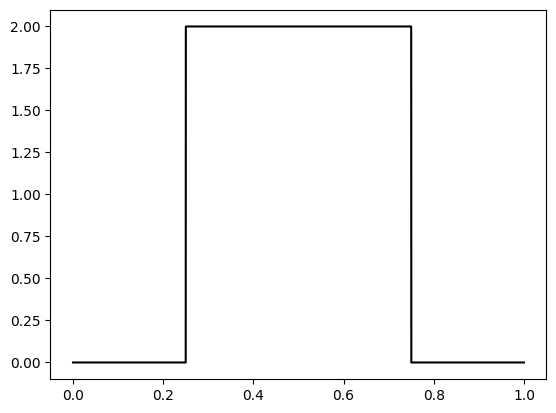

In [4]:
import matplotlib.pyplot as plt #setting the stage
time = list(range(len(stimulus)))
seconds = []

for idx in range(len(time)):
    seconds.append(time[idx]/10000) 
print(seconds)

plt.plot(seconds, stimulus, c='k')

#### Plot the stimulus and the response for the first trial
Plot the response (lower subplot) for the first trial alongside the stimulus (upper subplot) in a nicely annotated plot (x and y labels with units, title, fig size 20x4 inches, x axis limits are tight - they start/end with the first/last time point, see the figure template above)

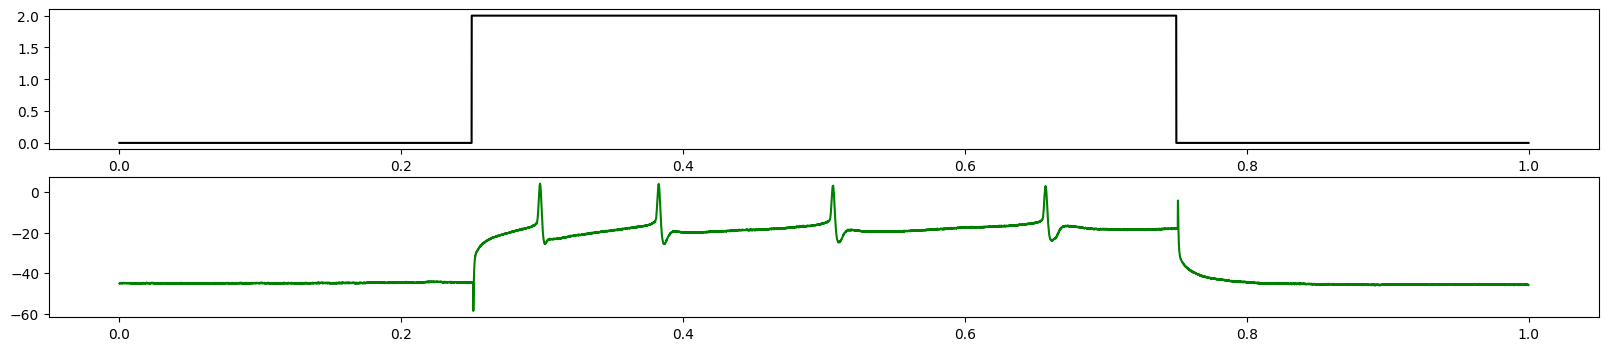

In [5]:

plt.figure(figsize=(20,4))

plt.subplot(2,1,1)
plt.plot(seconds, stimulus, c='k')

plt.subplot(2,1,2)
plt.plot(seconds, responses[0], c='green')

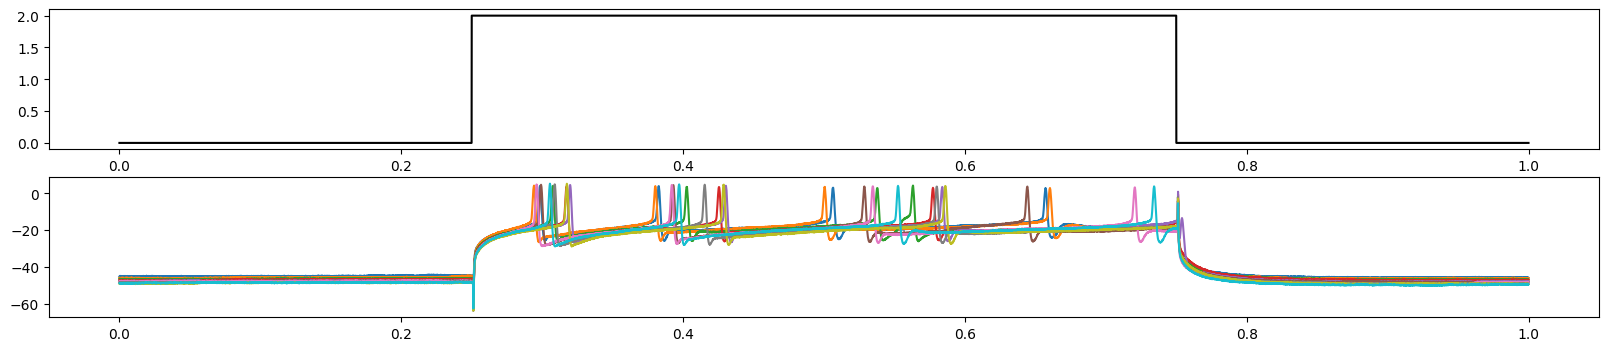

In [6]:
import matplotlib.pyplot as plt

time = list(range(len(stimulus)))
seconds = []
for idx in range(len(time)):
    seconds.append(time[idx]/len(stimulus)) 

plt.figure(figsize=(20,4))
plt.subplot(2,1,1)
plt.plot(seconds, stimulus, c='k')

plt.subplot(2,1,2)
for each in range(len(responses)):
    plt.plot(seconds, responses[each])




#### Save the plot to a file
Save as a png file, as done in the exercise. The filename should be the cell's name: `Retzius_cell.png` or `T_cell.png`.

To construct the filename, you need to concatenate the cell name (loaded and provided by `load_data`) and the file extension ('.png'). If you do not know how to concatenate two strings using python, ask the internet (or an AI).

#### Plot the voltage for all trials for the Retzius cell.
The Retzius cell data contains responses from trials.

Plot the responses for all trials alongside the stimulus: As before, the upper subplot should show the stimulus. The lower subplot should show the voltage traces for all trials. Of course, this plot should also be annotated properly.

__Hint__ The variable `responses` is a list of voltage traces, one voltage race per trial. Use a for loop to get each voltage trace and plot it.



10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


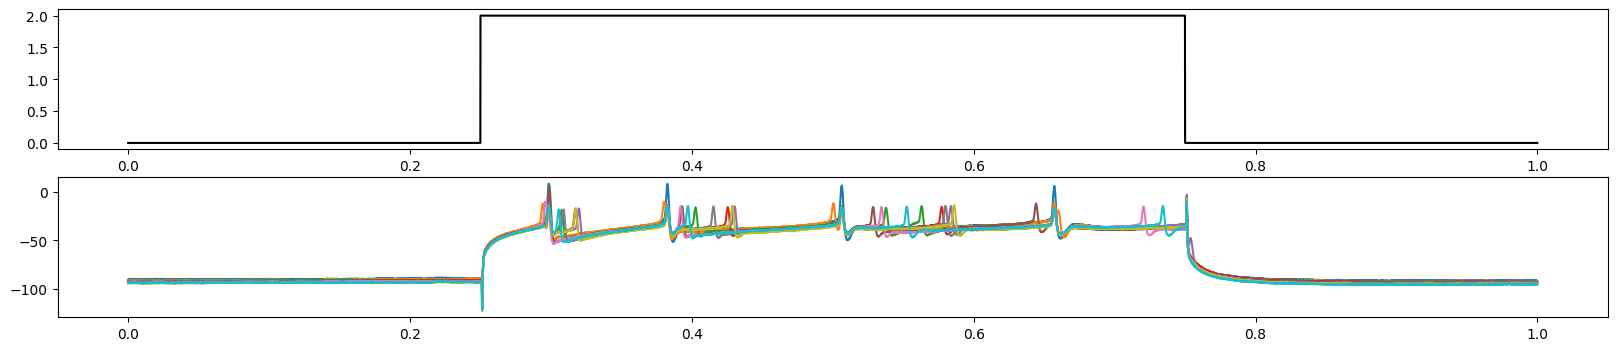

In [7]:
# your solution here
import matplotlib.pyplot as plt


time = list(range(len(stimulus)))
seconds = []
for idx in range(len(time)):
    seconds.append(time[idx]/len(stimulus)) 


plt.figure(figsize=(20,4))
plt.subplot(2,1,1)
plt.plot(seconds, stimulus, c='k')

plt.subplot(2,1,2)
for each in responses:
    plt.plot(seconds, responses[0]+each)

    print(len(seconds))


My figure is looking like that:
![](Updated.Retzius_cell.png)


My second figure is looking like that:
![](Updated.P_cell.png)


